In [1]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def Triangulate(A, B, n):

    vertices = [[0,0], [A,0], [0,B], [A,B]]
    cmap = plt.get_cmap('nipy_spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, n)]

    if n%2==0:
        k = n/2-1
        locations = vertices
    else:
        k = n//2-1
        locations = vertices
        locations.append([A/2,0])

    others_x = np.random.rand(k)*A
    others_y = np.random.rand(k)*B    
    for i in range(k):
        locations.append([others_x[i], others_y[i]])
    local = np.array(locations)
    
    tri = Delaunay(local)
    p = plt.triplot(local[:,0], local[:,1], tri.simplices)
    for i in range(len(local)):
        p = plt.plot(local[i,0], local[i,1], 'o', color='green')
        p = plt.annotate(str(i), (local[i,0], local[i,1]))

    count = 0
    for point in tri.simplices:
        x = [local[point[0]][0], local[point[1]][0], local[point[2]][0]]
        y = [local[point[0]][1], local[point[1]][1], local[point[2]][1]]
        p = plt.fill(x,y, color=colors[count])
        count+=1
        count = count%len(colors)
        
    edges = []

    for point in tri.simplices:
        data = {"Vetrices": [], "Edges": []}
        data["Vetrices"] = sorted([point[0], point[1], point[2]])
        for vert1 in data["Vetrices"]:
            for vert2 in data["Vetrices"]:
                if vert1!=vert2:
                    if n%2==0:
                        corner = [0, 1, 2, 3]
                    else:
                        corner = [0, 1, 2, 3, 4]
                    if vert1 in corner and vert2  in corner:
                        continue
                    else:    
                        if data["Edges"].count(sorted([vert1, vert2]))==0:
                            data["Edges"].append(sorted([vert1, vert2]))
        edges.append(data)
    
    fname = str(n) + "-Triangulation.png"
    plt.savefig(fname, dpi=600)

    return p, pd.DataFrame(edges)

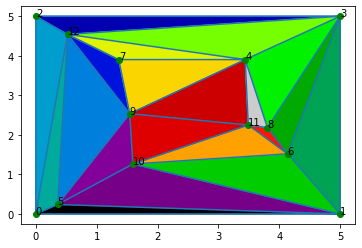

In [3]:
p, triangles = Triangulate(5,5,20)

In [4]:
triangles

,Vetrices,Edges
0,"[0, 1, 5]","[[0, 5], [1, 5]]"
1,"[1, 5, 10]","[[1, 5], [1, 10], [5, 10]]"
2,"[5, 9, 10]","[[5, 9], [5, 10], [9, 10]]"
3,"[2, 3, 12]","[[2, 12], [3, 12]]"
4,"[7, 9, 12]","[[7, 9], [7, 12], [9, 12]]"
5,"[5, 9, 12]","[[5, 9], [5, 12], [9, 12]]"
6,"[0, 2, 12]","[[0, 12], [2, 12]]"
7,"[0, 5, 12]","[[0, 5], [0, 12], [5, 12]]"
8,"[1, 3, 6]","[[1, 6], [3, 6]]"
9,"[3, 6, 8]","[[3, 6], [3, 8], [6, 8]]"
